In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
# Load data
df = pd.read_csv("C:/Users/kevin/Downloads/full_grouped.csv")
# Preview the data
df.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [3]:
# Check for data size
df.shape

(35156, 10)

In [4]:
# Check for missing values
df.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [5]:
df.columns

Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region'],
      dtype='object')

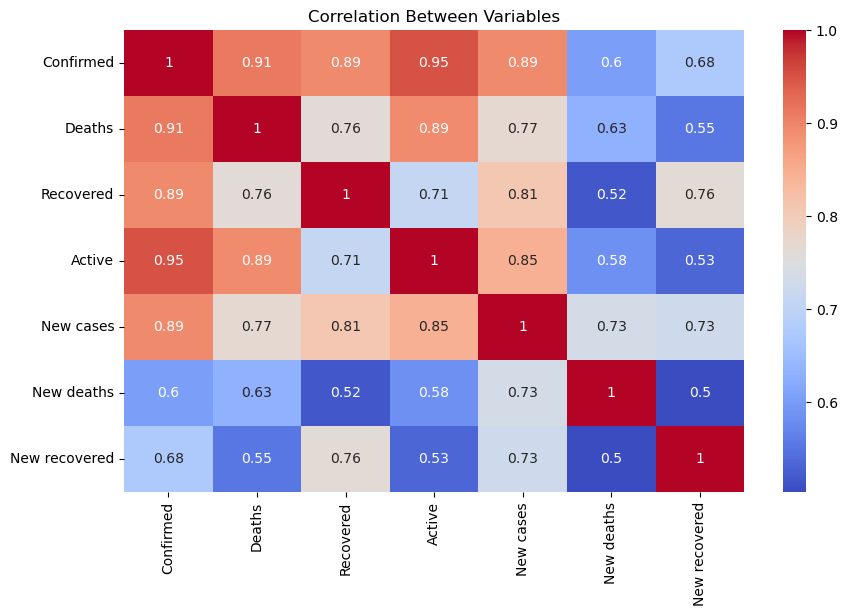

In [6]:
# Heat map of correlation between variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Variables')
plt.show()

In [7]:
X = df[['Confirmed','Recovered','Active', 'New cases', 'New deaths','New recovered']]
y = df['Deaths']

sorted_df = df.sort_values('Date', ascending=True)
train_size = int(0.8 * len(sorted_df))
train_data = sorted_df[:train_size]
test_data = sorted_df[train_size:]

X_train = train_data[['Confirmed','Recovered','Active', 'New cases', 'New deaths','New recovered']]
y_train = train_data['Deaths']
X_test = test_data[['Confirmed','Recovered','Active', 'New cases', 'New deaths','New recovered']]
y_test = test_data['Deaths']

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_r2 = r2_score(y_test, dt_pred)
dt_rmse = mean_squared_error(y_test, dt_pred, squared=False)

print("Decision Tree R-squared:", dt_r2)
print("Decision Tree RMSE:", dt_rmse)

Decision Tree R-squared: 0.8582982993117675
Decision Tree RMSE: 4645.774815320915


In [8]:
nn_model = MLPRegressor(random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)
nn_r2 = r2_score(y_test, nn_pred)
nn_rmse = mean_squared_error(y_test, nn_pred, squared=False)

print("Neural Network R-squared:", nn_r2)
print("Neural Network RMSE:", nn_rmse)

Neural Network R-squared: 0.9864629450037777
Neural Network RMSE: 1435.9281869182023


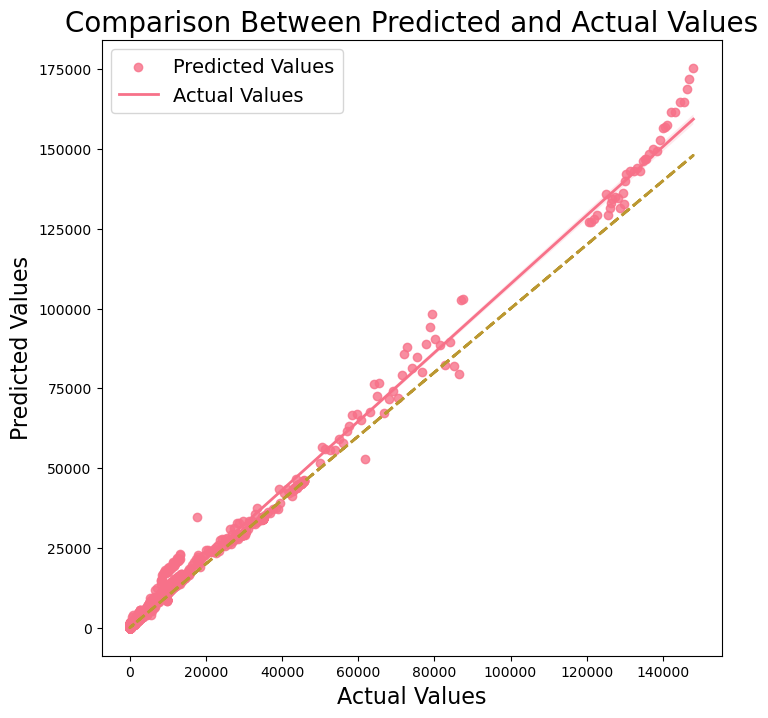

In [9]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette('husl')
sns.regplot(y=nn_pred, x=y_test, color=colors[0], line_kws={'linewidth': 2})
plt.xlabel('Actual Values', fontsize=16)
plt.ylabel('Predicted Values', fontsize=16)
plt.title('Comparison Between Predicted and Actual Values', fontsize=20)
plt.plot(y_test, y_test, color=colors[1], linestyle='--', linewidth=2)
plt.legend(['Predicted Values', 'Actual Values'], loc='upper left', fontsize=14)
plt.show()

In [12]:
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
r2 = r2_score(y_test, xgb_pred)
rmse = mean_squared_error(y_test, xgb_pred, squared=False)

print('XGBoost R2 score: {:.2f}'.format(r2))
print('XGBoost RMSE: {:.2f}'.format(rmse))

XGBoost R2 score: 0.92
XGBoost RMSE: 3485.38


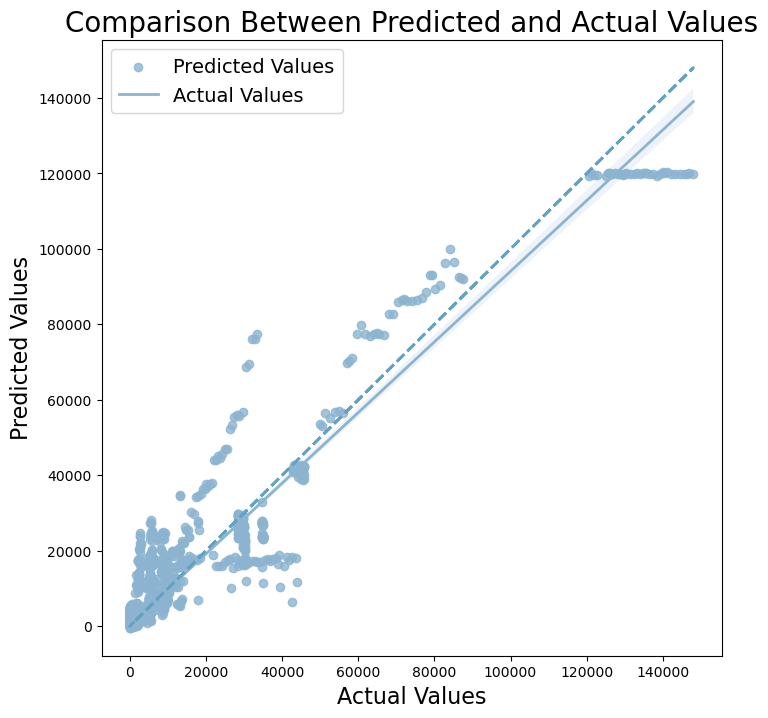

In [13]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette('PuBuGn_d')
sns.regplot(y=xgb_pred, x=y_test, color=colors[0], line_kws={'linewidth': 2})
plt.xlabel('Actual Values', fontsize=16)
plt.ylabel('Predicted Values', fontsize=16)
plt.title('Comparison Between Predicted and Actual Values', fontsize=20)
plt.plot(y_test, y_test, color=colors[1], linestyle='--', linewidth=2)
plt.legend(['Predicted Values', 'Actual Values'], loc='upper left', fontsize=14)
plt.show()

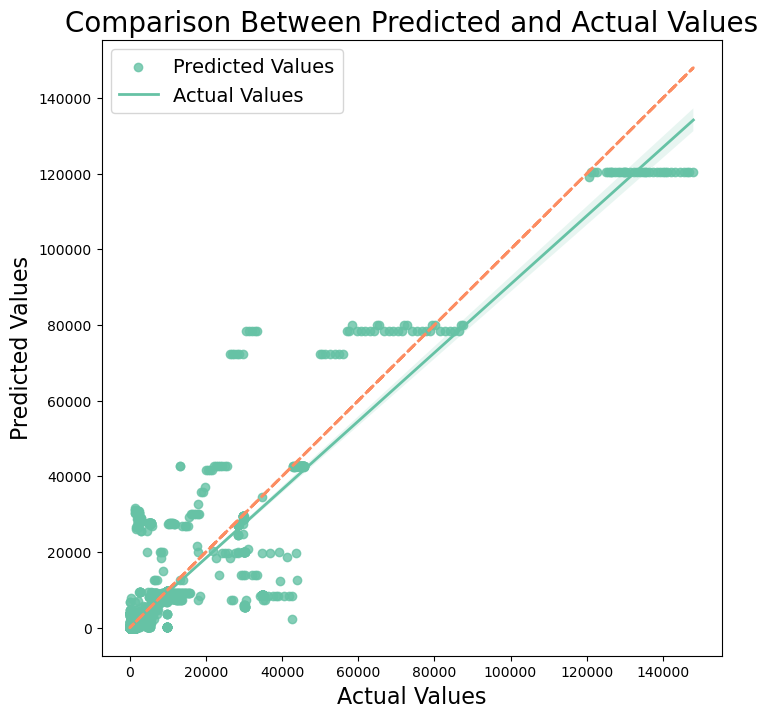

In [15]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette('Set2')
sns.regplot(y=dt_pred, x=y_test, color=colors[0], line_kws={'linewidth': 2})
plt.xlabel('Actual Values', fontsize=16)
plt.ylabel('Predicted Values', fontsize=16)
plt.title('Comparison Between Predicted and Actual Values', fontsize=20)
plt.plot(y_test, y_test, color=colors[1], linestyle='--', linewidth=2)
plt.legend(['Predicted Values', 'Actual Values'], loc='upper left', fontsize=14)
plt.show()

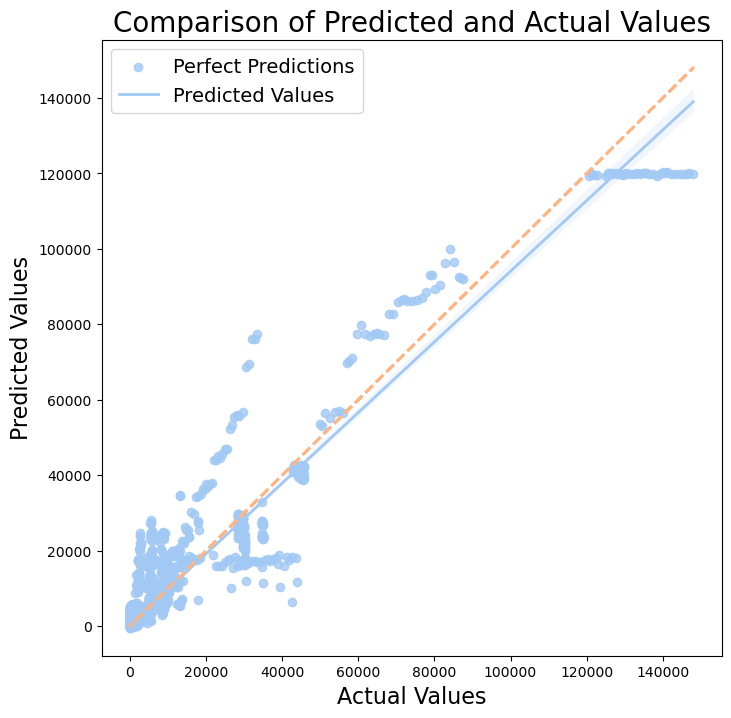

In [15]:
colors = sns.color_palette('pastel')

# Plot the predicted values against the actual values
plt.figure(figsize=(8, 8))
sns.regplot(y=y_pred, x=y_test, color=colors[0], line_kws={'linewidth': 2})

# Add labels and title to the plot
plt.xlabel('Actual Values', fontsize=16)
plt.ylabel('Predicted Values', fontsize=16)
plt.title('Comparison of Predicted and Actual Values', fontsize=20)

# Add a diagonal line to the plot to represent perfect predictions
plt.plot(y_test, y_test, color=colors[1], linestyle='--', linewidth=2)

# Add legend to the plot
plt.legend(['Perfect Predictions', 'Predicted Values'], loc='upper left', fontsize=14)

# Show the plot
plt.show()


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
print("Random Forest R-squared:", rf_r2)
print("Random Forest RMSE:", rf_rmse)

Random Forest R-squared: 0.9207092893492927
Random Forest RMSE: 3475.2158086569107


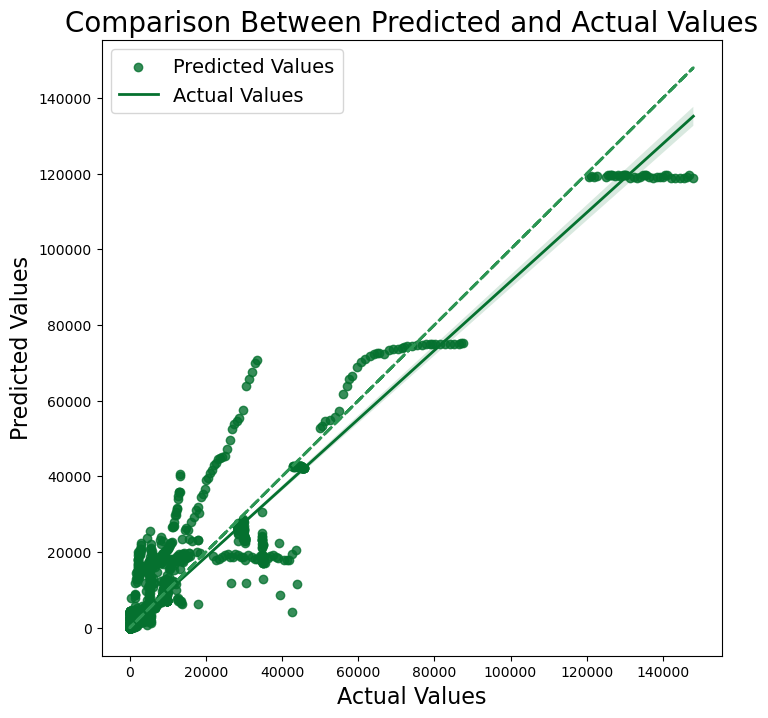

In [42]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette('BuGn_r')
sns.regplot(y=rf_pred, x=y_test, color=colors[0], line_kws={'linewidth': 2})
plt.xlabel('Actual Values', fontsize=16)
plt.ylabel('Predicted Values', fontsize=16)
plt.title('Comparison Between Predicted and Actual Values', fontsize=20)
plt.plot(y_test, y_test, color=colors[1], linestyle='--', linewidth=2)
plt.legend(['Predicted Values', 'Actual Values'], loc='upper left', fontsize=14)
plt.show()